
# <center> Gold Price Prediction

## Import Libraries




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


## Task 1: Initial Data Exploration

In [2]:
#read the dataset
df=pd.read_csv("gold_price.csv")
df.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [3]:
df['Return'] = df['USD (PM)'].pct_change()*100
df['Lagged_Return']=df.Return.shift()

In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

Date             0
USD (AM)         0
USD (PM)         0
GBP (AM)         0
GBP (PM)         0
EURO (AM)        0
EURO (PM)        0
Return           0
Lagged_Return    0
dtype: int64

In [6]:
df.describe()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Return,Lagged_Return
count,4680.000000,4680.000000,4680.000000,4680.000000,4680.000000,4680.000000,4680.000000,4680.000000
mean,960.322735,960.023814,625.273735,625.112196,774.164344,774.052840,0.043307,0.043555
std,449.524352,449.356282,324.558938,324.482796,351.621283,351.626281,1.100819,1.097457
min,256.700000,255.950000,176.572000,176.441000,276.711000,277.667000,-9.150114,-9.150114
25%,449.137500,449.137500,244.614250,244.870000,361.446500,361.554750,-0.496827,-0.487969
50%,1113.625000,1113.175000,717.834000,716.471500,878.523500,877.819000,0.040072,0.035654
75%,1293.900000,1294.325000,939.150750,939.309500,1086.049000,1085.838750,0.608311,0.604709
max,1896.500000,1895.000000,1265.900000,1265.010000,1389.890000,1392.030000,7.080884,7.080884


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4680 entries, 2 to 4717
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           4680 non-null   object 
 1   USD (AM)       4680 non-null   float64
 2   USD (PM)       4680 non-null   float64
 3   GBP (AM)       4680 non-null   float64
 4   GBP (PM)       4680 non-null   float64
 5   EURO (AM)      4680 non-null   float64
 6   EURO (PM)      4680 non-null   float64
 7   Return         4680 non-null   float64
 8   Lagged_Return  4680 non-null   float64
dtypes: float64(8), object(1)
memory usage: 365.6+ KB


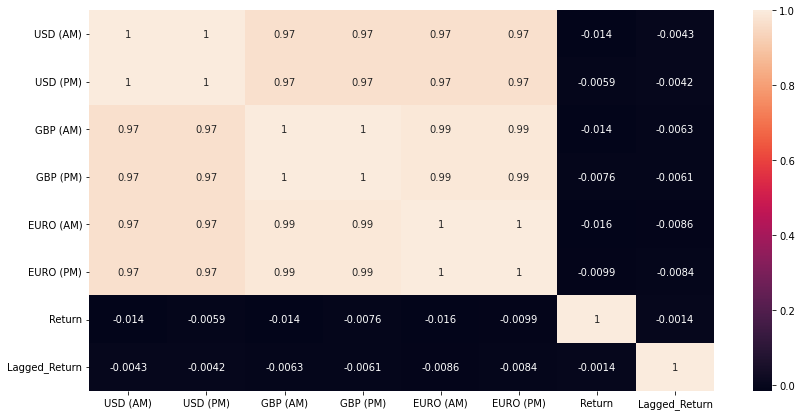

In [8]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
df=df.reset_index().drop(['index'],axis=1)
df.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM),Return,Lagged_Return
0,2001-01-04,268.75,267.1,178.869,178.352,282.538,282.049,-0.018716,-1.457027
1,2001-01-05,268.00,267.4,178.488,178.148,280.775,280.882,0.112317,-0.018716
2,2001-01-08,268.60,268.3,178.769,178.664,282.410,282.481,0.336574,0.112317
3,2001-01-09,267.75,267.0,179.855,179.195,284.507,283.590,-0.484532,0.336574
4,2001-01-10,266.70,266.3,178.777,178.665,283.573,283.298,-0.262172,-0.484532


## Task 2: Create Train & Test Sets

In [10]:
x=df.drop(['Return','Date'], axis= 1)
y=df[["Return"]]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
print("Length of x :",len(x))
print("Length of y :",len(y))
print("Length of x_train :",len(x_train))
print("Length of y_train :",len(y_train))
print("Length of x_test :",len(x_test))
print("Length of y_test :",len(y_test))


Length of x : 4680
Length of y : 4680
Length of x_train : 3744
Length of y_train : 3744
Length of x_test : 936
Length of y_test : 936


## Task 3: Develop Models & Predictions

In [12]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [13]:
import sklearn 
MSE = sklearn.metrics.mean_squared_error(y_test,y_pred)
print("MSE:",MSE)

MSE: 0.7240788751880187
